In [18]:
import pandas as pd
import numpy as np
import joblib
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from pandas_profiling import ProfileReport
import klib

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas_profiling'

 # Load Dataset

In [10]:
df = pd.read_csv(r"C:\Users\rhak1\OneDrive\Desktop\Stores-Sales-Prediction-main\data\Train.csv")
print(df.shape)

(8523, 12)


In [11]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# EDA


In [15]:
print("\n🔍 Basic Dataset Info:")
print(df.info())
print("\n🧾 Description:")
print(df.describe())
print("\n🧼 Missing Values:")
print(df.isna().sum())



🔍 Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

🧾 Description:
 

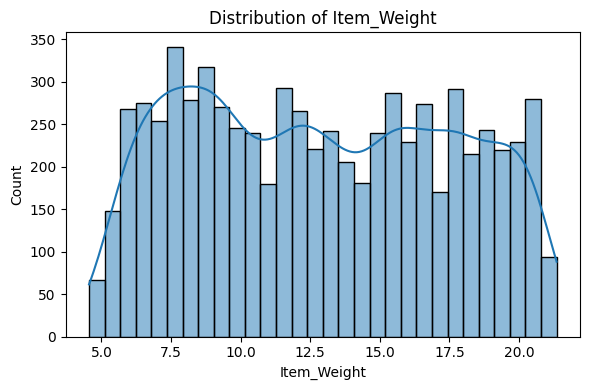

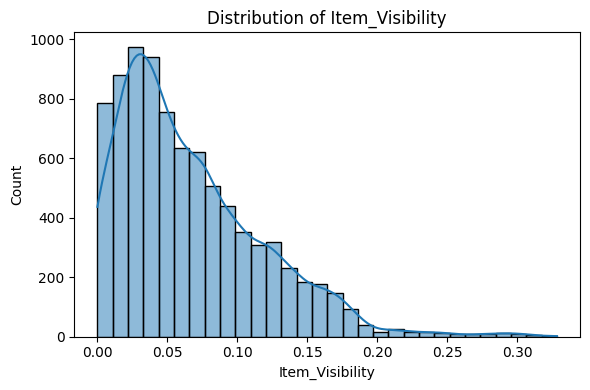

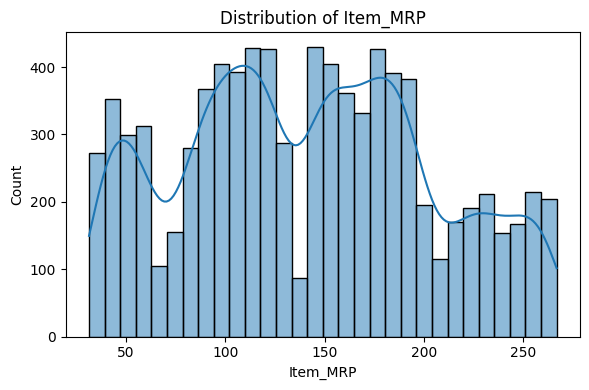

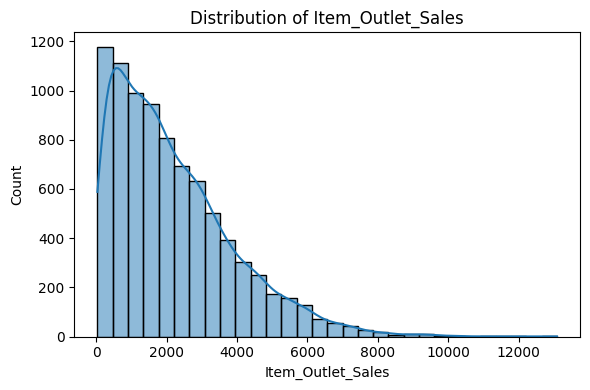

In [19]:
num_cols_plot = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
for col in num_cols_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


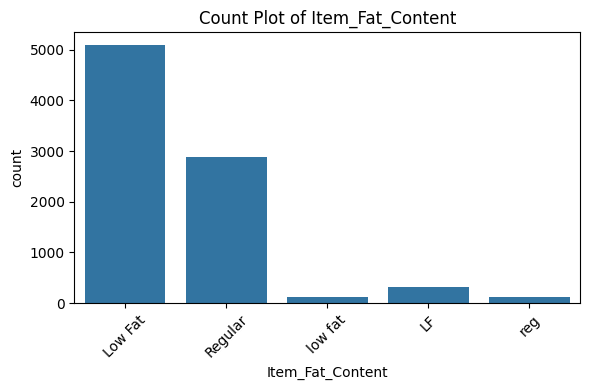

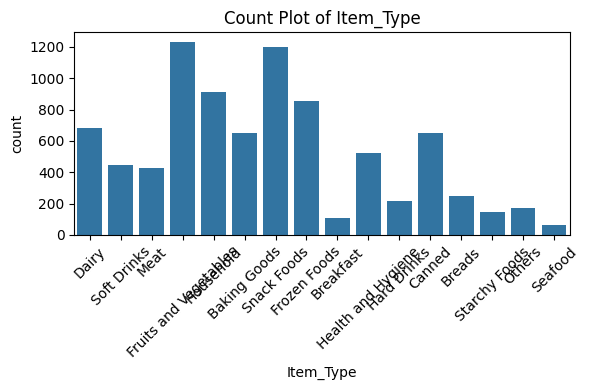

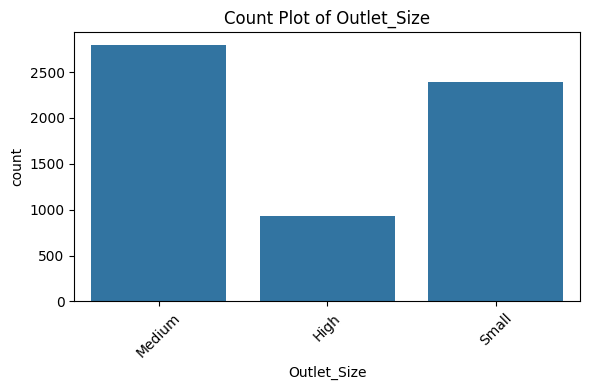

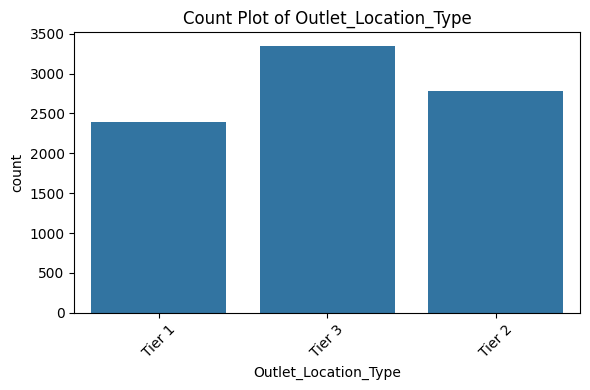

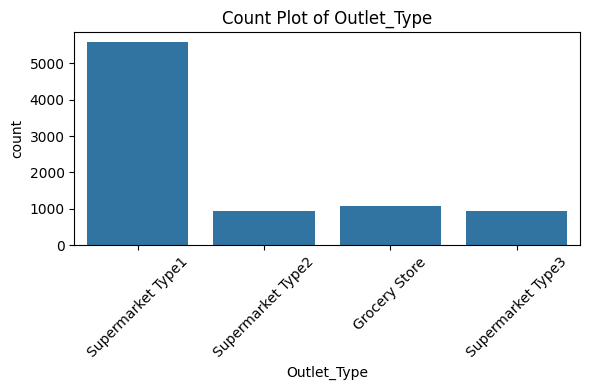

In [20]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\rhak1\AppData\Local\Temp\ipykernel_19632\142782298.py:4: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rhak1\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


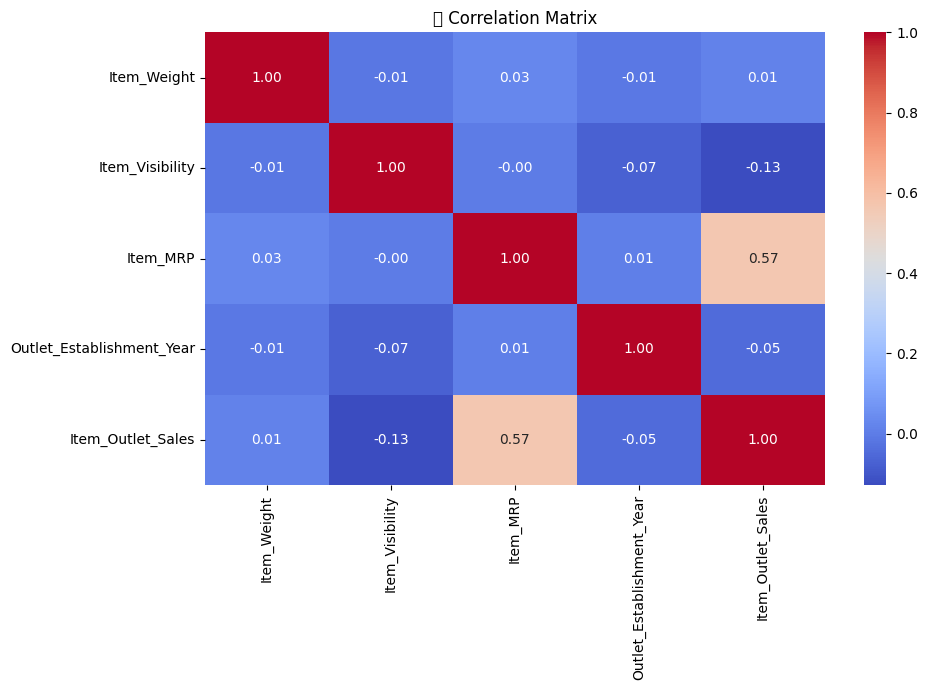

In [21]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Correlation Matrix")
plt.tight_layout()
plt.show()


# Handle Missing Values

In [22]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

C:\Users\rhak1\AppData\Local\Temp\ipykernel_19632\1998038990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
C:\Users\rhak1\AppData\Local\Temp\ipykernel_19632\1998038990.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

# Feature Engineering

In [23]:
df['New_Item_Type'] = df['Item_Identifier'].str[:2].map({
    'FD': 'Food',
    'NC': 'Non-Consumable',
    'DR': 'Drinks'
})
df['Outlet_Years'] = 2025 - df['Outlet_Establishment_Year']

In [24]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

# Label Encoding


In [29]:

le = LabelEncoder()
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type', 'New_Item_Type']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


# Standardization

In [70]:
num_cols = ['Item_Weight', 'Item_Visibility' ,'Item_MRP', 'Outlet_Years']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [71]:
final_features = [
    'Item_Weight', 'Item_Visibility', 'Item_MRP',
     'Outlet_Years',
    'Item_Fat_Content', 'Item_Type', 'Outlet_Type',
    'Outlet_Size', 'Outlet_Location_Type', 'New_Item_Type'
]


In [72]:
X = df[final_features]
y = df['Item_Outlet_Sales']


# train-test Split

In [73]:
X = df.drop("Item_Outlet_Sales", axis=1)
y = df["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [74]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    results[name] = -scores.mean()
    print(f"{name} CV RMSE: {-scores.mean():.2f}")

LinearRegression CV RMSE: 1213.97
RandomForest CV RMSE: 1148.81
XGBoost CV RMSE: 1124.11


In [75]:
best_model_name = min(results, key=results.get)
best_model = models[best_model_name].fit(X_train, y_train)
preds = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"\n✅ Best Model: {best_model_name}")
print(f"Test RMSE: {test_rmse:.2f}")


✅ Best Model: XGBoost
Test RMSE: 1056.97


In [76]:
joblib.dump(best_model, "sales_prediction.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [77]:
import joblib
model = joblib.load("sales_prediction.pkl")

# Get the actual feature names used during training
print(model.get_booster().feature_names)


['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type', 'Outlet_Years']
